# Analysis of Prosper Loan data

## by Tobias Hagemann

## Investigation Overview

> The following data wrangling and visualization steps will be used to analyse the given prosper loan data and will allow to highlight relations for a bright variaty of different factors.
> The data set has a massive size, different data regarding the loans and borrowers as well as related metadata (e.g. dates) are included. So focus should be the fiscal background of the borrower's and the impact on loan conditions.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. (according to data set summary - https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True)
In order to generate the results the following steps will e performed:
Extract - Obtain the data from a spreadsheet, SQL, the web, etc.
Clean - Here we could use exploratory visuals.
Explore - Here we use exploratory visuals.
Analyze - Here we might use either exploratory or explanatory visuals.
Share - Here is where explanatory visuals live.
(According to Udacity defintion - https://classroom.udacity.com/nanodegrees/nd002-ent/parts/9c2eb5bf-2bda-4e0c-85bf-d997082a8571/modules/22d4ed2d-b711-4e1d-8fed-604f524f0595/lessons/420e3a94-23b1-48b2-bf3f-3bf12fcb0318/concepts/5abc9451-790f-43c9-9b78-4dbc32a53ba1)
As the table contains 81 different factors, there will be a focus limited to the most "interesting" factors based on the findings in the first analysis steps.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Occupations

> In order to get an impression on the borrowers fiscal background, the occupation is analysed. But unfortunately this is not leading into too much results as the top rankings are "other" and "professional". The options to answer were not clear enough.

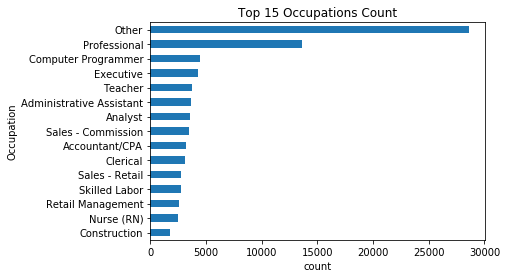

In [11]:
df['Occupation'].value_counts()[14::-1].plot(kind='barh')
plt.title('Top 15 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12
plt.figsize=(12,12)

As this outcome is due to the high number of unspecific entries not valuable enough, the prosperity ranking is giving a better overview.

In [10]:
df_highlimit = df[df['AvailableBankcardCredit'] > 120000]
df_limit = df.drop(df_highlimit.index)

df_limit.AvailableBankcardCredit.describe()

count    105967.000000
mean      10545.357423
std       16096.992564
min           0.000000
25%         873.000000
50%        4065.000000
75%       12980.000000
max      119920.000000
Name: AvailableBankcardCredit, dtype: float64

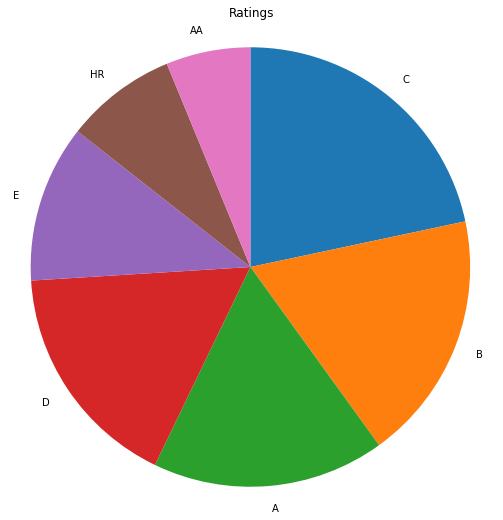

In [9]:
plt.figure(figsize = [16, 9])

sorted_counts = df_limit['ProsperRating (Alpha)'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
plt.title('Ratings');

So loans are given to comnpletely different classes of prosperity. It would be ow interesting to see how the further background of the borrower is looking like. Is on top of that also income important and how is that impacted the credit APRs etc.?

## Relation between borrower's circumstances and loan condition

> After the first visializations have shown, that rating, income and other quantitive feedback are important, it should be outlined how those values are interacting with each other.

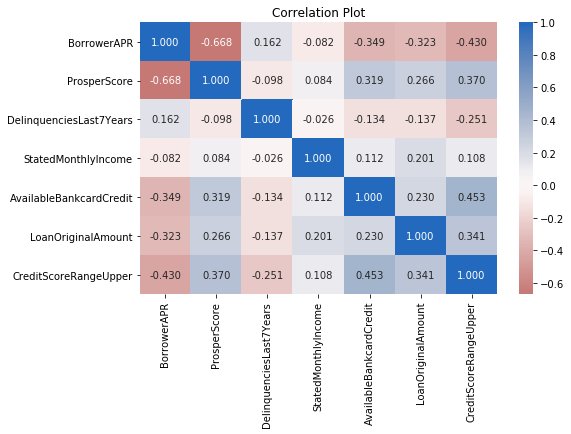

In [3]:
num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'LoanOriginalAmount','CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

As the borrowers APR has some several higher values, this should be analysed in detail, if there might be combinations of different values leading in sum to a higher impact on the APR.

## Validating results



In [4]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color');
    plt.hist2d(x, y, bins = [10, 10], cmap = palette, cmin = 0.5);

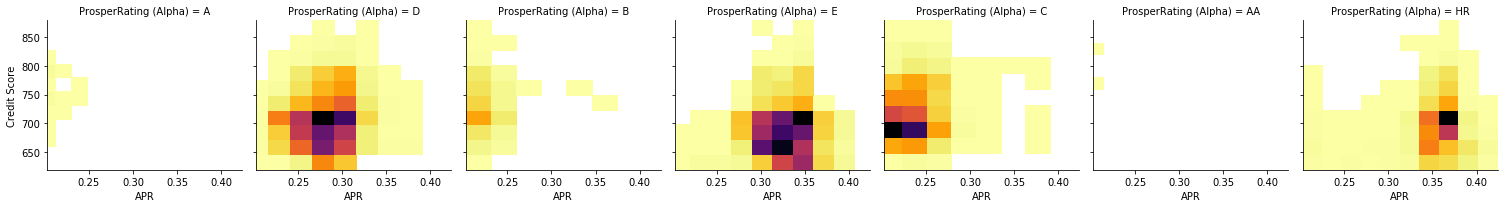

In [5]:
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', height = 3);
g.map(hist2dgrid, 'BorrowerAPR', 'CreditScoreRangeUpper', color = 'inferno_r');
g.set_xlabels('APR');
g.set_ylabels('Credit Score');

The results are not surprising. Borrowers with better financial background (indicated by the rating) will get better conditions and easier a loan as they can be more trusted as financial robust.

## Concusion

The absolute monthly income was surprisingly not that important. In the real world it would be intersting to use the monthly income & the prosperity rating to go into details and check e.g. if people with high income have additional loans for further investment objects or have also higher fix costs as they have better insurances etc.. 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!